In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("E:\\dataset\\ecommerce1.csv")

In [3]:
df.shape

(500, 8)

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel Wrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common Diazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582 Cobbborough, DC...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway Port Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage Port Jacobville, PR 37...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


No null values.

In [7]:
df.Avatar.value_counts()

GreenYellow      7
Cyan             7
CadetBlue        7
Teal             7
SlateBlue        7
                ..
LawnGreen        1
PaleGreen        1
MediumPurple     1
PowderBlue       1
PaleGoldenRod    1
Name: Avatar, Length: 138, dtype: int64

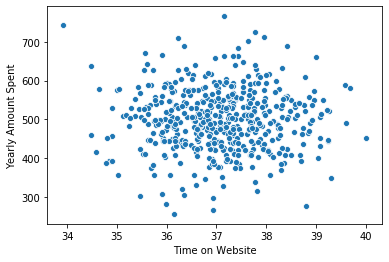

In [8]:
sns.scatterplot(x=df["Time on Website"],y=df["Yearly Amount Spent"])

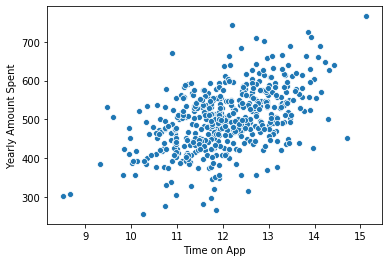

In [9]:
sns.scatterplot(x=df["Time on App"],y=df["Yearly Amount Spent"])

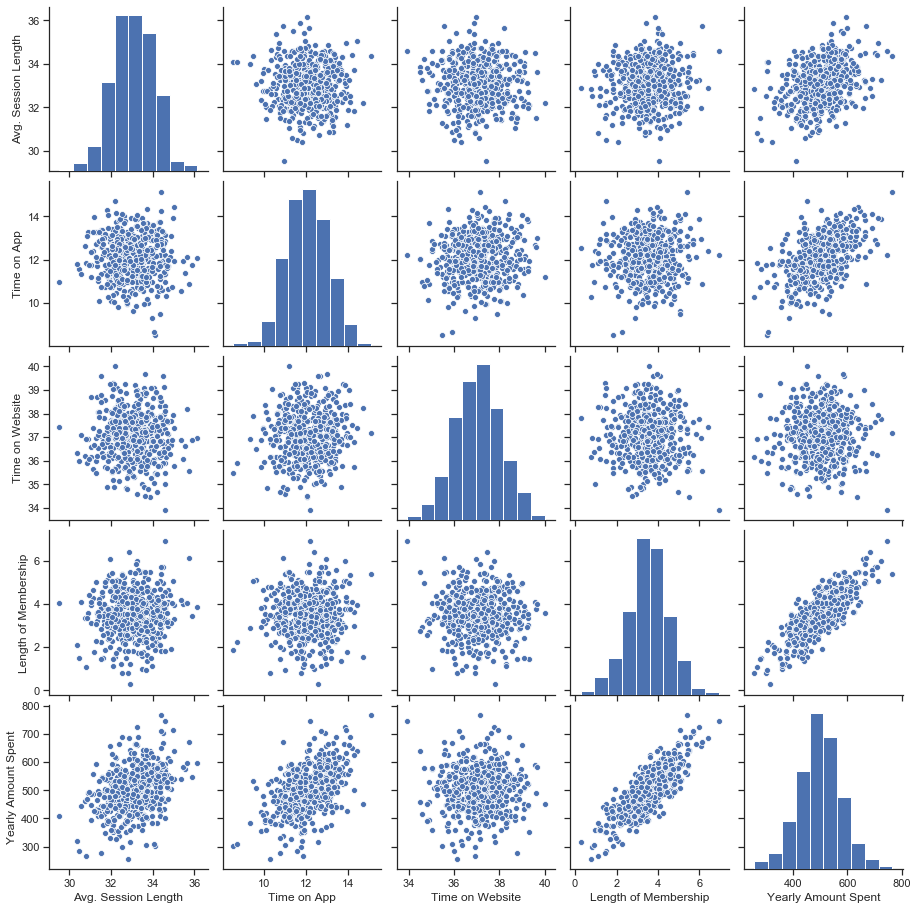

In [10]:
# Here output is yearly amount spent and rest are input.
#as there are multiple inputs, check for multicolinearity.
sns.set(style='ticks',color_codes=True)
sns.pairplot(df)

From above graph, there is no linear relationship between inputs. But, there is a linear relationship between length of membership vs yearly amount spent.

In [11]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [12]:
x=df[["Avg. Session Length", "Time on App","Time on Website", "Length of Membership"]]
y=df["Yearly Amount Spent"]

In [13]:
#splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [14]:
from sklearn.linear_model import LinearRegression
m1=LinearRegression()
m1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
pred=m1.predict(x_test)

In [16]:
pred

array([509.04559072, 480.14715361, 452.19886254, 542.65840812,
       548.1528712 , 473.83014463, 608.6425619 , 638.54429726,
       507.69201462, 667.14323366, 703.46449937, 486.95473149,
       643.92693091, 417.5085418 , 380.74131944, 478.84006411,
       456.81385798, 488.50764247, 497.69652852, 446.1441652 ,
       478.28707848, 467.25724   , 407.73972706, 435.45321839,
       448.79171237, 485.70122994, 441.4927797 , 621.97820717,
       523.87591444, 527.10381324, 438.46924988, 479.00821391,
       421.70745239, 399.02538645, 350.09320845, 396.32272885,
       549.13193243, 513.16080311, 496.2407282 , 458.48081905,
       500.49151018, 523.63642149, 520.01582064, 554.16745262,
       604.97532421, 476.57010807, 378.11089639, 436.01462229,
       512.22994234, 494.48769349, 414.89723429, 456.9020678 ,
       408.83587033, 418.94167038, 500.44303369, 543.58347837,
       520.31687502, 457.23491936, 529.73319408, 443.41254855,
       577.71085481, 444.02548649, 530.86044389, 562.57

    In linear regression, algorithm use set of coefficients in weighted sum of inputs to calculate output. These coefficicent gives score that determint which input parameter is more contributing for output.

In [32]:
# to get the importance of features
imp=m1.coef_
imp

array([25.66865637, 38.70208507,  0.63998676, 61.49547702])

above feature important score corresponds to
 Avg. Session Length, Time on App,Time on Website, Length of Membership respectively

so, time on app contributes 38.88 and time on website contributes 0.2634. Company can focus more on website.
Because they are week on website sales.

In [27]:
m1.coef_

array([25.66865637, 38.70208507,  0.63998676, 61.49547702])

Text(0, 0.5, 'predicted values')

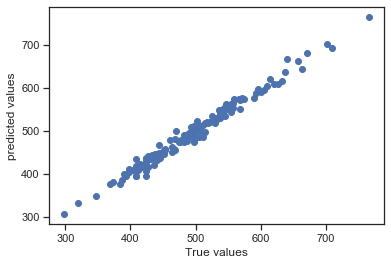

In [28]:
plt.scatter(y_test, pred)
plt.xlabel("True values")
plt.ylabel("predicted values")


In [29]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,pred)

8.17087765936517

In [30]:
metrics.mean_squared_error(y_test,pred)

107.27963234930196

In [31]:
metrics.explained_variance_score(y_test,pred)

0.9823642602331045